Data Diri

Nama : Mochamad Rafli Ramadhan

Tempat, Tanggal Lahir : Semarang, 16 Desember 1999

Institusi : Universitas Gadjah Mada


In [ ]:
#Import library yang di butuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)     #2.3.0

2.3.0


In [ ]:
#Mengunduh File Zip atau Dataset
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-07 14:18:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.45MB/s    in 48s     

2020-11-07 14:18:55 (6.48 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Mengimport module zipfile dan os
import zipfile,os

In [ ]:
#Ekstaksi data
file_name = '/tmp/rockpaperscissors.zip'
#Read mode zip file
zip_ref = zipfile.ZipFile(file_name, 'r')
#zip_ref.printdir() perintah untuk menampilkan tabel of content
#Mengekstak semua file
zip_ref.extractall('/tmp')
zip_ref.close()
#Setelah selesai ektraksi print Done
print("Done")

Done


In [ ]:
#Membuat folder atau directory baru pada folder utama
os.mkdir('/tmp/rockpaperscissors/train')
os.mkdir('/tmp/rockpaperscissors/valid')

In [ ]:
#Memberi nama variabel pada file atau directory dan menambahkan path pada suatu directory
dir_utama = '/tmp/rockpaperscissors'
dir_rock = os.path.join(dir_utama, 'rock')
dir_paper = os.path.join(dir_utama, 'paper')
dir_scissors = os.path.join(dir_utama, 'scissors')
dir_train = os.path.join(dir_utama, 'train')
dir_valid = os.path.join(dir_utama, 'valid')

In [ ]:
#Mengecek folder atau directory yang telah dibuat
os.listdir('/tmp/rockpaperscissors')
#os.listfile('/tmp/rockpaperscissors') untuk mengecek file

['rock',
 'scissors',
 'README_rpc-cv-images.txt',
 'valid',
 'train',
 'paper',
 'rps-cv-images']

In [ ]:
#Membuat folder atau direcotry baru dalam folder train dan valid 
os.mkdir('/tmp/rockpaperscissors/train/rock')
os.mkdir('/tmp/rockpaperscissors/train/paper')
os.mkdir('/tmp/rockpaperscissors/train/scissors')
os.mkdir('/tmp/rockpaperscissors/valid/rock')
os.mkdir('/tmp/rockpaperscissors/valid/paper')
os.mkdir('/tmp/rockpaperscissors/valid/scissors')

In [ ]:
#Memberi nama variabel dan menambahkan path pada directory 
train_rock = os.path.join(dir_train, 'rock')
train_paper = os.path.join(dir_train, 'paper')
train_scissors = os.path.join(dir_train, 'scissors')
valid_rock = os.path.join(dir_valid, 'rock')
valid_paper = os.path.join(dir_valid, 'paper')
valid_scissors = os.path.join(dir_valid, 'scissors')

In [ ]:
#Mengecek folder yang telah dibuat pada path dir_train
os.listdir(dir_train)

['rock', 'scissors', 'paper']

In [ ]:
#Mengecek folder yang telah dibuat
os.listdir(dir_valid)

['rock', 'scissors', 'paper']

In [ ]:
#Membagi data pada dataset rock, paper, dan scissor menjadi train dan valid
from sklearn.model_selection import train_test_split

#40% untuk test dan 60% untuk train

x_train_rock, y_valid_rock = train_test_split(os.listdir(dir_rock), test_size = 0.4,random_state=0)
x_train_paper, y_valid_paper = train_test_split(os.listdir(dir_paper), test_size = 0.4,random_state=0)
x_train_scissors, y_valid_scissors = train_test_split(os.listdir(dir_scissors), test_size = 0.4,random_state=0)

In [ ]:
#Mengcopy hasil dataset yang telah dibagi menjadi train dan valid ke directory baru agar lebih rapi
import shutil

train_rock = [shutil.copy(os.path.join(dir_rock, i), os.path.join(train_rock, i)) for i in x_train_rock]
train_paper = [shutil.copy(os.path.join(dir_paper,i), os.path.join(train_paper,i)) for i in x_train_paper]
train_scissors = [shutil.copy(os.path.join(dir_scissors,i), os.path.join(train_scissors,i)) for i in x_train_scissors]   

valid_rock = [shutil.copy(os.path.join(dir_rock, i), os.path.join(valid_rock,i)) for i in y_valid_rock]
valid_paper = [shutil.copy(os.path.join(dir_paper, i), os.path.join(valid_paper,i)) for i in y_valid_paper]
valid_scissors = [shutil.copy(os.path.join(dir_scissors, i), os.path.join(valid_scissors,i)) for i in y_valid_scissors]

In [ ]:
#Data Augmentation dengan menggunakan Image Data Generator (Menghasilkan gambar dari data)
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    zoom_range=0.25)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    zoom_range=0.25)

In [ ]:
#Membuat suatu flow data untuk train dan validasi
train_generator = train_datagen.flow_from_directory(
        dir_train,               # direktori data train
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical') #klasifikasi categorical untuk multi-class

validation_generator = test_datagen.flow_from_directory(
        dir_valid,              # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, 
        class_mode='categorical') #klasifikasi categorical untuk multi-class


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#Membuat model machine learning
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#Ringkasan model yang telah dibentuk
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [ ]:
#Memilih loss category dan optimizer adam
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
#Melakukan fitting model
history = model.fit(
          train_generator,
          steps_per_epoch=20,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=20,
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2)

Epoch 1/25
25/25 - 22s - loss: 0.1100 - accuracy: 0.9700 - val_loss: 0.0973 - val_accuracy: 0.9688
Epoch 2/25
25/25 - 22s - loss: 0.1106 - accuracy: 0.9650 - val_loss: 0.1170 - val_accuracy: 0.9688
Epoch 3/25
25/25 - 22s - loss: 0.0740 - accuracy: 0.9762 - val_loss: 0.0728 - val_accuracy: 0.9688
Epoch 4/25
25/25 - 22s - loss: 0.0756 - accuracy: 0.9750 - val_loss: 0.0586 - val_accuracy: 0.9750
Epoch 5/25
25/25 - 23s - loss: 0.0575 - accuracy: 0.9850 - val_loss: 0.0494 - val_accuracy: 0.9875
Epoch 6/25
25/25 - 22s - loss: 0.0645 - accuracy: 0.9750 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 7/25
25/25 - 23s - loss: 0.0504 - accuracy: 0.9825 - val_loss: 0.0485 - val_accuracy: 0.9812
Epoch 8/25
25/25 - 22s - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0917 - val_accuracy: 0.9625
Epoch 9/25
25/25 - 22s - loss: 0.0835 - accuracy: 0.9762 - val_loss: 0.0724 - val_accuracy: 0.9812
Epoch 10/25
25/25 - 22s - loss: 0.0682 - accuracy: 0.9787 - val_loss: 0.0816 - val_accuracy: 0.9750
Epoch 11/

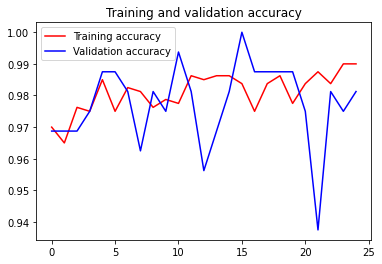

<Figure size 432x288 with 0 Axes>

In [ ]:
#Membuat plot terhadap akurasi model pada data training dan validasi
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#Menampilkan grafik
plt.show()

Saving Paper.jpg to Paper.jpg
Paper.jpg
paper


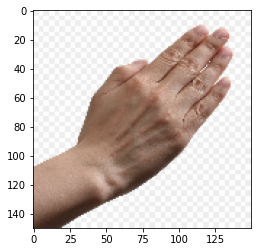

In [ ]:
#Melakukan prediksi model dan mencetak hasilnya
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

%matplotlib inline

#Upload file
uploaded = files.upload()

for path in uploaded.keys():
    img = image.load_img(path, target_size =(150,150)) # Memuat gambar dari path 
    plt.imshow(img)                                    # Menampilkan Gambar
    x = image.img_to_array(img)                        # Mengubah gambar menjadi array
    x = np.expand_dims(x, axis=0)                      # Menambah dimensi di posisi axis yang ditetapkan
    
    images = np.vstack([x])                            # Menumpuk array secara vertikal
    classes = model.predict(images, batch_size=10)     # Prediksi Model
    
    print(path)                                        # Mencetak hasil prediksi
    if classes[0][0]>=classes[0].max():
        print('paper')
    elif classes[0][1]>=classes[0].max():
        print('rock')
    else:
        print('scissors')
     
   